# Final Project Report

* Class: DS 5100
* Student Name: Hannah Valenty
* Student Net ID: unc6kr
* This URL: https://github.com/hvalenty/ds5100-finalproject-unc6kr/blob/main/HV_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/hvalenty/ds5100-finalproject-unc6kr 

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd


class Die():
    '''
    The Die Class creates a die object. A die has N faces (sides)
    and W weights. A die can be rolled to select a face, where each
    face of a die is a unique symbol (alphabetic or numeric). These 
    faces have weights associated with them (default 1.0) and can 
    be changed following the creation of a die object. The one behavior
    of a die is that it can be rolled one or more times.

    Methods
    -------
    __init__()
    change_side_weight()
    roll_the_die()
    current_state()
    '''
    def __init__(self, faces):
        '''
        Initalize the Die class.
        __init__(self, faces)

        Parameters
        ----------
        faces : np.array
            Array can contain string or numeric (int, float)
            types, and must have distinct (unique) values.

        Changes
        -------
        weights: np.array
            Array is initalized to all ones, but can
            be changed with method following initalization.
        
        _df_faces_weights: np.DataFrame
            Private attribute dataframe to save die faces and weights.
        Returns
        -------
        None
        '''
        # Check for faces type (must be NumPy array)
        try:
            assert isinstance(faces, np.ndarray)
        except:
            raise TypeError("Faces must be a NumPy array.")
        
        # Check for data type within faces array (must be string or numeric)
        try:
            for val in faces:
                assert (type(val) == np.str_) | (type(val) == np.int_) | (type(val) == np.float_)\
                                           | (type(val) == int) | (type(val) == float) | (type(val) == str)
        except:
            raise TypeError('Faces must be data type strings or numbers.')
        
        # Check if faces array has distinct values (must be all unique)
        try:
            assert len(set(faces)) == len(faces)
        except:
            raise ValueError('The faces array must have distinct values.')
        
        # Initalize with input faces array 
        #self.faces = faces

        # Initalize weights with array of ones
        weights = np.ones(len(faces))
        #self.weights = weights

        # Save faces and weights arrays in a private dataframe
        self._df_faces_weights = pd.DataFrame(weights, faces)
        

    def change_side_weight(self, face_value, new_weight):
        '''
        Change the weight of a single face (side) of a die.
        change_side_weight(self, face_value, new_weight)

        Parameters
        ----------
        face_value: str or numeric (int, float)
            Face value must be present in list of die's faces,
            if not, a IndexError is raised.
        new_weight: numeric (int, float)
            If the input can be cast as numeric that action
            is done, otherwise TypeError is raised.
        
        Changes
        -------
        weights: np.array
            Corresponding die face_value's weight in vector is
            changed to user new_weight input. 

        Returns
        -------
        None
        '''
        # Check the input face is in the die faces array
        try:
            assert face_value in self._df_faces_weights.index
        except: 
            raise IndexError('This face is not present in the die array.')
        
        # Check if the input weight is a numeric type
        try:
            #assert (type(new_weight) == np.bool_) | (type(new_weight) == np.int_) | (type(new_weight) == np.float_)
            assert isinstance(new_weight, (int, float))
            new_weight = float(new_weight)
        except:
            raise TypeError('Input weight must be a numeric type (or castable to one).')
        
        # Identify cell to reassign weight and assign with input
        self._df_faces_weights.loc[face_value, 0] = new_weight


    def roll_the_die(self, num_roll = 1):
        '''
        Roll the die object one or more times.
        roll_the_die(self, num_roll = 1)

        Parameters
        ----------
        num_roll: int, default 1
            Define number of die rolls, essentially
            sampling with replacement.

        Returns
        -------
        List of roll outcomes, but not stored internally.
        '''
        # Check if the input roll count is an integer type
        try:
            assert isinstance(num_roll, int)
        except:
            raise TypeError('Input roll must be an integer type.')
        
        # Roll the die using sampling with replacement
        rolled = self._df_faces_weights.sample(n = num_roll, 
                                        replace = True,
                                        weights = self._df_faces_weights[0])
        return rolled.index.to_list()
        

    def current_state(self):
        '''Return a copy of die dataframe with faces and weights
        current_state(self)
        
        Returns
        -------
        np.DataFrame(faces, weights)
            Current state of the die.
        '''
        return self._df_faces_weights.copy()



class Game():
    '''
    The Game Class makes a game object. Each game is initalized
    with a Python list which contains one or more die. These dice
    must be similar dice (same number of sides and associated faces),
    but each may have their own weights. Game objects have a behavior to 
    play a game (roll all dice set number of times), and they only keep
    the results of their most recent play.

    Methods
    -------
    __init__()
    play()
    show_play_results()
    '''
    def __init__(self, die_list):
        '''
        Initalize the Game class.
        __init__(self, die_list)

        Parameters
        ----------
        die_list: list
            List should contain die objects, all with
            the same faces.

        Returns
        -------
        None
        '''
        self.die_list = die_list

    def play(self, times_rolled):
        '''
        Play a game by choosing number of dice rolls
        play(self, times_rolled)

        Parameters
        ----------
        times_rolled: int
            Specify the number of times the dice should be rolled.

        Changes
        -------
        _df_play: pd.DataFrame
            Private attribute dataframe in wide format.
            Index: roll number
            Columns: die number (list index as header)
            Cells: face rolled in each instance

        Returns
        -------
        None
        '''
        # Check if the roll amount is an integer type
        try:
            assert isinstance(times_rolled, int)
        except:
            raise TypeError('Input roll must be an integer type.')
        roller = []
        for die in self.die_list:
            roller.append(die.roll_the_die(times_rolled))
        self._df_play = pd.DataFrame(roller).T
        
    def show_play_results(self, frame_form = 'wide'):
        '''
        Show user the results of most recent play.
        show_play_results(self, frame_form = 'wide)

        Parameters
        ----------
        frame_form: 'wide' or 'narrow', default 'wide'
            Format returned dataframe, returns ValueError
            if neither option is chosen.
        
        Returns
        -------
        pd.DataFrame()
            Private attribute dataframe in wide or narrow format.
            Index: roll number
            Columns: die number (list index as header)
            Cells: face rolled in each instance
        '''
        if frame_form == 'wide':
            return self._df_play.copy()
        elif frame_form == 'narrow':
            # MultiIndex with roll number and die number, respectively
            return self._df_play.stack().copy()
        else:
            raise ValueError('Parameter frame_form must be set to "narrow" or "wide".')


class Analyzer():
    '''
    The Analyzer Class creates an analyzer object which takes the
    results of a single game and computes various descriptive
    statistical properties.

    Methods
    -------
    __init__()
    jackpot()
    face_count_per_roll()
    combo_count()
    permutation_count()
    '''
    def __init__(self, game):
        '''
        Initalize the Analyzer class.
        __init__(self, game)

        Parameters
        ----------
        game: Game
            Game object as input, throws a ValueError if the
            passed value is not a game.

        Returns
        -------
        None
        '''
        if not isinstance(game, Game):
            raise ValueError('Analyzer class only accepts Game objects.')
        self.game = game

    def jackpot(self):
        '''
        Computes number of times a game results in a jackpot.
        jackpot(self)

        Parameters
        ----------
        None

        Returns
        -------
        int
            Number of jackpots in a game.
        '''
        jackpot_count = 0
        for index, row in self.game._df_play.iterrows():
            if len(row.unique()) == 1:
                jackpot_count += 1
        return jackpot_count

    def face_count_per_roll(self):
        '''
        Computes number of times a given face is rolled in
        each event.
        face_count_per_roll(self)

        Parameters
        ----------
        None

        Returns
        -------
        pd.DataFrame
            Results of rolls in wide dataframe form.
            Index: roll number
            Columns: face values
            Cells: count values
        '''
        # Empty dict and list for face counts
        results = {}
        big_list_csv = []
        # Iterate over rows in game results
        for indexer, row in self.game._df_play.iterrows():
            # face_comp is Die faces list to match with
            # roll_comp which is roll results list
            face_comp = self.game.die_list[0]._df_faces_weights.index
            roll_comp = row.to_list()
            # Below loop counts matches between face_comp and roll_comp
            for i in face_comp:
                results[i] = roll_comp.count(i)
                # appends in comma separated list form
                big_list_csv.append(results[i]) 
        # Convert list to string and clean it up
        big_string = str(big_list_csv).replace('[', '').replace(']','').split(', ')
        # Chunk long data string into proper form for pandas dataframe
        big_string_lister = [big_string[x:x + len(self.game.die_list[0]._df_faces_weights.index)]\
                for x in range(0, len(big_string), len(self.game.die_list[0]._df_faces_weights.index))]
        # Make the final output dataframe
        closer = pd.DataFrame(big_string_lister, columns=self.game.die_list[0]._df_faces_weights.index)
        return closer

    def combo_count(self):
        '''
        Compute distinct combinations (order-independent) of faces
        rolled, along with their counts.
        combo_count(self)

        Parameters
        ----------
        None

        Returns
        -------
        pd.DataFrame
            Order-independent combinations which may contain repetitions.
            MultiIndex: distinct combinations 
            Column: associated counts
        '''
        pal = []
        # Iterate through rows of game play dataframe
        for indexer, row in self.game._df_play.iterrows():
            # Sort each row to "standardize" the order of face appearance
            # thus making combinations order IN-dependent
            pal.append(sorted(row.to_list()))
        return pd.DataFrame(pal).value_counts().to_frame()
        
    def permutation_count(self):
        '''
        Compute distinct permutations (order-dependent) of faces
        rolled, along with their counts.
        permutation_count(self)

        Parameters
        ----------
        None

        Returns
        -------
        pd.DataFrame
            Order-dependent permutations which may contain repetitions.
            MultiIndex: distinct permutations 
            Column: associated counts
        '''
        return self.game._df_play.value_counts().to_frame()
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
from montecarlo.montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd
import unittest

class DieTestSuite(unittest.TestCase):

    def test_01_init(self):
        # Check if die object is of Die type and create dataframe
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        self.assertIs(type(die), Die)
        self.assertIs(type(die._df_faces_weights), pd.DataFrame)

    def test_02_change_side_weight(self):
        # Check if after weights change private 
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        die.change_side_weight(1, 100)
        self.assertEqual(die._df_faces_weights[0][1], 100)

    def test_03_roll_the_die(self):
        # Check if rolled return is a list
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        rolled = die.roll_the_die(5)
        self.assertIs(type(rolled), list)

    def test_04_current_state(self):
        # Check if state return is a pd.DataFrame
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        state = die.current_state()
        self.assertIs(type(state), pd.DataFrame)


class GameTestSuite(unittest.TestCase):
    
    def test_05_init(self):
        # Check if game object is of Game type
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        die_list = [die, die, die]
        game = Game(die_list)
        self.assertIs(type(die_list), list)
        self.assertIs(type(game), Game)

    def test_06_play(self):
        # Check if play operates on and saves dataframe
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        die_list = [die, die, die]
        game = Game(die_list)
        game.play(5)
        self.assertIs(type(game._df_play), pd.DataFrame)
        self.assertEqual(len(game._df_play.index), 5)

    def test_07_show_play_results(self):
        # Check if show play returns dataframe
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        die_list = [die, die, die]
        game = Game(die_list)
        game.play(5)
        show_play = game.show_play_results()
        self.assertIs(type(show_play), pd.DataFrame)


class AnalyzerTestSuite(unittest.TestCase):

    def test_08_init(self):
        # Check if analyzer object is of Analyzer type
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        die_list = [die, die, die]
        game = Game(die_list)
        game.play(5)
        analyzer = Analyzer(game)
        self.assertIs(type(game), Game)
        self.assertIs(type(analyzer), Analyzer)

    def test_09_jackpot(self):
        # Check if jackpot returns type integer
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        die_list = [die, die, die]
        game = Game(die_list)
        game.play(5)
        analyzer = Analyzer(game)
        jack_num = analyzer.jackpot()
        self.assertIs(type(jack_num), int)

    def test_10_face_count_per_roll(self):
        # Check if face counts returns dataframe
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        die_list = [die, die, die]
        game = Game(die_list)
        game.play(5)
        analyzer = Analyzer(game)
        face_count = analyzer.face_count_per_roll()
        self.assertIs(type(face_count), pd.DataFrame)

    def test_11_combo_count(self):
        # Check if combo counts returns dataframe
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        die_list = [die, die, die]
        game = Game(die_list)
        game.play(5)
        analyzer = Analyzer(game)
        combine_count = analyzer.combo_count()
        self.assertIs(type(combine_count), pd.DataFrame)

    def test_12_permutation_count(self):
        # Check if combo counts returns dataframe
        die_face = np.array([1,2,3,4,5,6])
        die = Die(die_face)
        die_list = [die, die, die]
        game = Game(die_list)
        game.play(5)
        analyzer = Analyzer(game)
        permute_count = analyzer.permutation_count()
        self.assertIs(type(permute_count), pd.DataFrame)


if __name__ == '__main__':
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```bash
test_08_init (montecarlo_test.AnalyzerTestSuite) ... ok
test_09_jackpot (montecarlo_test.AnalyzerTestSuite) ... ok
test_10_face_count_per_roll (montecarlo_test.AnalyzerTestSuite) ... ok
test_11_combo_count (montecarlo_test.AnalyzerTestSuite) ... ok
test_12_permutation_count (montecarlo_test.AnalyzerTestSuite) ... ok
test_01_init (montecarlo_test.DieTestSuite) ... ok
test_02_change_side_weight (montecarlo_test.DieTestSuite) ... ok
test_03_roll_the_die (montecarlo_test.DieTestSuite) ... ok
test_04_current_state (montecarlo_test.DieTestSuite) ... ok
test_05_init (montecarlo_test.GameTestSuite) ... ok
test_06_play (montecarlo_test.GameTestSuite) ... ok
test_07_show_play_results (montecarlo_test.GameTestSuite) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.022s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import montecarlo.montecarlo

montecarlo.py has been successfully imported!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo)

Help on package montecarlo:

NAME
    montecarlo

PACKAGE CONTENTS
    montecarlo

FILE
    c:\users\valenty\vscode\ds5100-finalproject-unc6kr\montecarlo\__init__.py




In [4]:
help(montecarlo.Die)

Help on class Die in module montecarlo.montecarlo:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  The Die Class creates a die object. A die has N faces (sides)
 |  and W weights. A die can be rolled to select a face, where each
 |  face of a die is a unique symbol (alphabetic or numeric). These 
 |  faces have weights associated with them (default 1.0) and can 
 |  be changed following the creation of a die object. The one behavior
 |  of a die is that it can be rolled one or more times.
 |  
 |  Methods
 |  -------
 |  __init__()
 |  change_side_weight()
 |  roll_the_die()
 |  current_state()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      Initalize the Die class.
 |      __init__(self, faces)
 |      
 |      Parameters
 |      ----------
 |      faces : np.array
 |          Array can contain string or numeric (int, float)
 |          types, and must have distinct (unique) values.
 |      
 |      Changes
 |      -------
 |      weights: np.array
 |        

In [5]:
help(montecarlo.Game)

Help on class Game in module montecarlo.montecarlo:

class Game(builtins.object)
 |  Game(die_list)
 |  
 |  The Game Class makes a game object. Each game is initalized
 |  with a Python list which contains one or more die. These dice
 |  must be similar dice (same number of sides and associated faces),
 |  but each may have their own weights. Game objects have a behavior to 
 |  play a game (roll all dice set number of times), and they only keep
 |  the results of their most recent play.
 |  
 |  Methods
 |  -------
 |  __init__()
 |  play()
 |  show_play_results()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, die_list)
 |      Initalize the Game class.
 |      __init__(self, die_list)
 |      
 |      Parameters
 |      ----------
 |      die_list: list
 |          List should contain die objects, all with
 |          the same faces.
 |      
 |      Returns
 |      -------
 |      None
 |  
 |  play(self, times_rolled)
 |      Play a game by choosing number of dice rolls
 |

In [6]:
help(montecarlo.Analyzer)

Help on class Analyzer in module montecarlo.montecarlo:

class Analyzer(builtins.object)
 |  Analyzer(game)
 |  
 |  The Analyzer Class creates an analyzer object which takes the
 |  results of a single game and computes various descriptive
 |  statistical properties.
 |  
 |  Methods
 |  -------
 |  __init__()
 |  jackpot()
 |  face_count_per_roll()
 |  combo_count()
 |  permutation_count()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game)
 |      Initalize the Analyzer class.
 |      __init__(self, game)
 |      
 |      Parameters
 |      ----------
 |      game: Game
 |          Game object as input, throws a ValueError if the
 |          passed value is not a game.
 |      
 |      Returns
 |      -------
 |      None
 |  
 |  combo_count(self)
 |      Compute distinct combinations (order-independent) of faces
 |      rolled, along with their counts.
 |      combo_count(self)
 |      
 |      Parameters
 |      ----------
 |      None
 |      
 |      Returns
 |      --

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/hvalenty/ds5100-finalproject-unc6kr/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```bash
$ pip install .
Processing c:\users\valenty\vscode\ds5100-finalproject-unc6kr
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: Monte-Carlo
  Building wheel for Monte-Carlo (setup.py) ... done
  Created wheel for Monte-Carlo: filename=Monte_Carlo-1.0.0-py3-none-any.whl size=5742 sha256=46629b4f85d64674b8536c1ab4910eca9f6a5f56230c0f6b9e8ac5225a62707f
  Stored in directory: c:\users\valenty\appdata\local\pip\cache\wheels\c6\d4\b5\0ab0dc044ff1e30a66162aea8751869f6b61a5a4422242ae4d
Successfully built Monte-Carlo
Installing collected packages: Monte-Carlo
Successfully installed Monte-Carlo-1.0.0
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [8]:
import numpy as np
import pandas as pd

In [11]:
coin_sides = np.array(['H','T'])
fair_coin = montecarlo.Die(coin_sides)
unfair_coin = montecarlo.Die(coin_sides)
unfair_coin.change_side_weight('H', 5)

In [12]:
fair_coin.current_state()

,0
H,1.0
T,1.0


In [13]:
unfair_coin.current_state()

,0
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [14]:
coin_list = [fair_coin, fair_coin]
game0 = montecarlo.Game(coin_list)
game0.play(1000)
game0.show_play_results()

,0,1
0,H,H
1,T,T
2,T,H
3,T,T
4,T,T
...,...,...
995,T,T
996,H,T
997,T,T
998,T,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [16]:
coin_list3 = [unfair_coin, unfair_coin, fair_coin]
game1 = montecarlo.Game(coin_list3)
game1.play(1000)
game1.show_play_results()

,0,1,2
0,H,T,T
1,H,H,H
2,H,H,H
3,H,H,T
4,H,H,T
...,...,...,...
995,H,T,H
996,H,T,H
997,T,H,H
998,T,H,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [17]:
# Instantiate analyzer objects
analyzer0 = montecarlo.Analyzer(game0)
analyzer1 = montecarlo.Analyzer(game1)

In [18]:
# Frequency of jackpots
j0 = analyzer0.jackpot()
j1 = analyzer1.jackpot()
print(f'Game 0 jackpot frequency is {j0}, and Game 1 jackpot frequency is {j1}')

Game 0 jackpot frequency is 532, and Game 1 jackpot frequency is 343


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [19]:
rf0 = j0/1000
rf1 = j1/1000
print(f'Game 0 relative frequency is {rf0}, and Game 1 relative frequency is {rf1}')

Game 0 relative frequency is 0.532, and Game 1 relative frequency is 0.343


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Analyzer Relative Frequency Comparison')

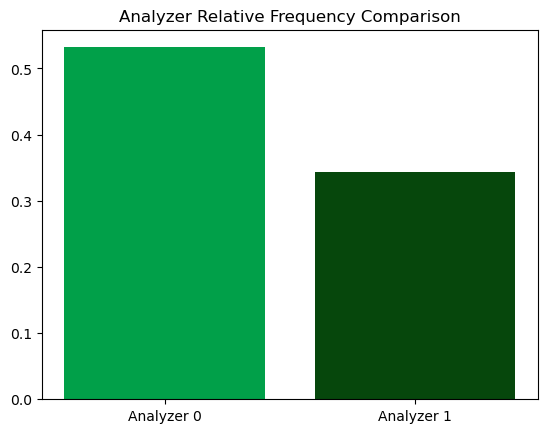

In [20]:
import matplotlib.pyplot as plt
plt.bar(['Analyzer 0', 'Analyzer 1'], height = [rf0, rf1], color = ['xkcd:emerald','xkcd:forest green'])
plt.title('Analyzer Relative Frequency Comparison')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).